# Statistical Power


## The power of a statistical test
The power of a statistical test is defined the probability of rejecting the null hypothesis, given that it is indeed false.\
As with any probability, the power of a statistical test, therefore, ranges from 0 to 1, with 1 being a perfect test that guarantees rejecting the null hypothesis when it is indeed false. 

Intrinsically, this is related to $\beta$, the probability of type II errors.When designing a statistical test, a researcher will typically determine an acceptable $\alpha$, such as .05, the probability of type I errors. (Recall that type I errors are when the null-hypothesis is rejected when actually true.) From this given $\alpha$ value, an optimal threshold for rejecting the null-hypothesis can be determined. That is, for a given $\alpha$ value, you can calculate a threshold that maximizes the power of the test. For any given $\alpha$, $power = 1 - \beta$.


> Note: Ideally, $\alpha$ and $\beta$ would both be minimized, but this is often costly, impractical or impossible depending on the scenario and required sample sizes. 

## Effect Size
The effect size is the magnitude of the difference you are testing between 2 groups.

Thus far, you've mainly been investigating the mean of a sample. For example, after flipping a coin n number of times, you've investigated using a t-test to determine whether the coin is a fair coin (p(heads)=0.5). To do this, you compared the mean of the sample to that of another sample, if comparing coins, or to a know theoretical distribution. Similarly, you might compare the mean income of a sample population to that of a census tract to determine if the populations are statistically different. In such cases, Cohen's D is typically the metric used as the effect size. 

Cohen's D is defined as:  $ d = \frac{m_1 - m_2}{s}$,  where $m_1$ and $m_2$ are the respective sample means and s is the overall standard deviation of the samples. 

> When looking at the difference of means of two populations, Cohen's D is equal to the difference of the sample means divided by the pooled standard deviation of the samples. The pooled standard deviation of the samples is the average spread of all data points in the two samples around their group mean. 


## Power analysis

Since $\alpha$, power, sample size, and effect size are all related quantities, you can take a look at some plots of the power of some t-tests, given varying sample sizes. This will allow you to develop a deeper understanding of how these quantities are related and what constitutes a convincing statistical test. There are three things to go into the calculation of power for a test. They are:

* alpha value
* effect size
* sample size   

Let's look at how power might change in the context of varying effect size. To start, imagine the scenario of trying to detect whether or not a coin is fair. In this scenario, the null-hypothesis would be $H_0(heads) = 0.5$ because our assumption is that we are dealing with a fair coin. From here, the power will depend on both the sample size and the effect size (that is the threshold for the null hypothesis to be rejected). For example, if the alternative hypothesis has a large margin from the null-hypothesis such as $H_a(heads) = 0.8$ or $H_a(heads) = 0.9$ (large effect size), then there is a higher chance of rejecting the null-hypothesis (power is increased). If there is a smaller margin between the null hypothesis and an alternate hypothesis, an unfair coin where $P(heads)=.6$ for example (small effect size), there is a lower chance of rejecting the null hypothesis (power is reduced).

To start, you might choose an alpha value that you are willing to accept such as $\alpha=0.05$. From there, you can observe the power of various statistical tests against various sample and effect sizes.  

For example, if we wish to state the alternative hypothesis $H_a = .55$, then the effect size (using Cohen's D) would be:

$ d = \frac{m_1 - m_2}{s}$  
$ d = \frac{.55 - .5}{s}$

Furthermore, since we are dealing with a binomial variable, the standard deviation of the sample should follow the formula $\sqrt{n\bullet p(1-p)}$.  
So some potential effect size values for various scenarios might look like this:

In [1]:
import numpy as np
import pandas as pd

m1 = .55
m2 = .5
p = m2
rows = []
for n in [10, 20, 50, 500]:
    std = np.sqrt(n*p*(1-p))
    d = (m1-m2)/std
    rows.append({'Effect_Size': d, 'STD': std, 'Num_observations': n})
print('Hypothetical effect sizes for p(heads)=.55 vs p(heads)=.5')
pd.DataFrame(rows)

Hypothetical effect sizes for p(heads)=.55 vs p(heads)=.5


,Effect_Size,STD,Num_observations
0,0.031623,1.581139,10
1,0.022361,2.236068,20
2,0.014142,3.535534,50
3,0.004472,11.180340,500


As a general rule of thumb, all of these effect sizes are quite small. here's the same idea expanded to other alternative hypotheses:

In [2]:
m2 = .5
rows = {}
for n in [10, 20, 50, 500]:
    temp_dict = {}
    for m1 in [.51, .55, .6, .65, .7, .75, .8, .85, .9]:
        p = m1
        std = np.sqrt(n*p*(1-p))
        d = (m1-m2)/std
        temp_dict[m1] = d
    rows[n] = temp_dict
print('Hypothetical effect sizes for various alternative hypotheses')
df = pd.DataFrame.from_dict(rows, orient='index')
# df.index = [10,20,50, 500]
# df.index.name = 'Sample_Size'
# df.columns.name = 'Alternative Hypothesis'
df

Hypothetical effect sizes for various alternative hypotheses


,0.51,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
10,0.006326,0.031782,0.064550,0.099449,0.138013,0.182574,0.237171,0.309965,0.421637
20,0.004473,0.022473,0.045644,0.070321,0.097590,0.129099,0.167705,0.219179,0.298142
50,0.002829,0.014213,0.028868,0.044475,0.061721,0.081650,0.106066,0.138621,0.188562
500,0.000895,0.004495,0.009129,0.014064,0.019518,0.025820,0.033541,0.043836,0.059628


While a bit long winded, you can see that realistic effect sizes for this scenario could be anywhere from 0.05 (or lower) up to approximately .4.

Now that you have some parameter estimates for  𝛼
  and the effect size, you can map subsequent relationships for the power and sample size. Again, this is because any three of these quantities (alpha, effect size, sample size and power) will determine the fourth.

As you've also seen, a common statistical test for comparing sample means is the t-test. Statsmodels has some convenient build in functions for calculating the power of a t-test and plotting power curves. Take a look:

In [3]:
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots

In [4]:
power_analysis = TTestIndPower()

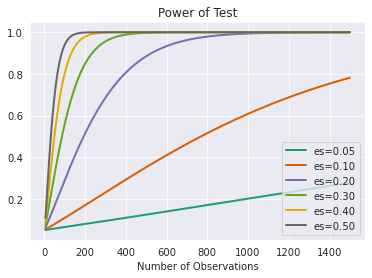

In [5]:
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()

As this should demonstrate, detecting small perturbances can be quite difficult! 

Similarly, just because a t-test has an incredibly small p-value doesn't necessarily imply a strong statistical test. As is mentioned in the article *Using Effect Size - or Why the P Value Is Not Enough*, referenced below, using incredibly large sample sizes such as 22,000 can make even the most trivial effect size statistically significant. Realizing these reciprocal relationships and considering all 4 parameters: alpha, effect size, sample size, and power are all important when interpreting the results (such as the p-value) of a statistical test.

In addition to plotting a full curve, you can also calculate specific values. Simply don't specify one of the four parameters.

In [6]:
# Calculate power
power_analysis.solve_power(effect_size=.2, nobs1=80, alpha=.05)

0.24175778678474177

In [7]:
# Calculate sample size required
power_analysis.solve_power(effect_size=.2, alpha=.05, power=.8)

393.4056989990335

In [8]:
# Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power_analysis.solve_power(nobs1=25, alpha=.05, power=.8)

0.8087077886680412

In [9]:
# Calculate alpha (less traditional)
power_analysis.solve_power(nobs1=25, effect_size=.3, power=.8)

0.6613634273431555

You can also simulate your own data to verify results:

In [10]:
import scipy.stats as stats
def run_ttest_sim(p1, p2, std, nobs, alpha=0.05, n_sim=10**5):
    """p1 and p2 are the underlying means probabilities for 2 normal variables
    Samples will be generated using these parameters."""
    # Calculate Normalized Effect Size
    effect_size = np.abs(p1-p2)/std
    
    # Run a Simulation
    # Initialize array to store results
    p = (np.empty(n_sim))
    p.fill(np.nan)

    #  Run a for loop for range of values in n_sim
    for s in range(n_sim):
        control = np.random.normal(loc= p1, scale=std, size=nobs)
        experimental = np.random.normal(loc= p2, scale=std, size=nobs)
        t_test = stats.ttest_ind(control, experimental)
        p[s] = t_test[1]
    
    num_null_rejects = np.sum(p < alpha)
    power = num_null_rejects/n_sim
    # Store results
    stat_dict = {'alpha':alpha,
                 'nobs':nobs,
                 'effect_size':effect_size,
                 'power': power}
    return stat_dict

run_ttest_sim(.5, .7, 1, 50)

{'alpha': 0.05,
 'nobs': 50,
 'effect_size': 0.19999999999999996,
 'power': 0.16714}

In [11]:
print(power_analysis.solve_power(nobs1=50, effect_size=0.19999999999999996, alpha=0.05))

print(power_analysis.solve_power(nobs1=50, effect_size=0.19999999999999996, power=0.16719))

print(power_analysis.solve_power(nobs1=50, power=0.16719, alpha=0.05))

print(power_analysis.solve_power(power=0.16719, effect_size=0.19999999999999996, alpha=0.05))

0.1676754863454749
0.049779515826212206
0.19959710069445308
49.80313313853301


# LABS

# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under-sample size constraints.

## Objectives

In this lab you will: 

- Describe the impact of sample size and effect size on power 
- Perform power calculation using SciPy and Python 
- Demonstrate the combined effect of sample size and effect size on statistical power using simulations

## Let's get started!

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.
  
To start, let's import the necessary libraries required for this simulation: 

In [12]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis: 

    There is no difference between experimental and control group mean change in percentage of liver fat 
    
$$\mu_{1} = \mu_{2}$$
  
And the alternative Hypothesis:

    There is a difference between experimental and control group mean change in percentage of liver fat 

$$\mu_{1} \neq \mu_{2}$$
    
  

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll run a power analysis simulation: 

In [23]:
# Number of patients in each group
sample_size = 12 #Half placebo and half treatment

# Control group
control_mean = 0
control_sd = 0.21

# Experimental group
experimental_mean = 0.17
experimental_sd = 0.21

# Set the number of simulations for our test = 1000
n_sim = 1000

You can now start running simulations to run an independent t-test with above data and store the calculated p-value in our `p` array. Perform following tasks: 

* Initialize a numpy array and fill it with `NaN` values for storing the results (p_value) of the independent t-test  
* For a defined number of simulations (i.e., 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independent t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations where the null hypothesis is rejected


In [24]:
# For reproducibility 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim

for s in range(n_sim):

    control = np.random.normal(loc= control_mean, scale=control_sd, size=sample_size)
    
    experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)
    
    t_test = stats.ttest_ind(control, experimental)
    
    p[s] = t_test[1]

# number of null hypothesis rejections
num_null_rejects = np.sum(p < 0.05)
power = num_null_rejects/float(n_sim)

power

# 0.495

0.495

These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experiment is 49%. This can be interpreted as follows:

> **If a large effect (0.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research 0.8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of 0.17 or greater between the group means with an 80% power.

In [25]:
# Required power
target = 0.8

In [26]:
from statsmodels.stats.power import TTestIndPower
power = TTestIndPower()

In [29]:
# Determine the sample size
power.solve_power(effect_size=0.17/0.21, alpha = 0.05, power = 0.8)

24.951708908275144

In [30]:
# Minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initialize a list for storing sample size x power summary
* While current power is less than the target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size, power
    * increase the sample size by 1 and repeat

In [31]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

power_sample = []

# Keep iterating as shown above until desired power is obtained
while null_rejected < target:

    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
    
    # For control group 
    # Here we specify size=[n_sim, sample_size] which creates an array of n_sim number of arrays,
    # each containing sample_size number of elements. 
    # This is equivalent to manually looping n_sim times like we did above but is much faster.
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    
    # For experimental group
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            
    
    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
                                
    p_vals = result[1]

    # Since you know that all simulations are from a different distribution \
    # all those that rejected the null-hypothesis are valid
    null_rejected = np.sum(p_vals < 0.05) / n_sim

    print('Number of Samples:', sample_size,', Calculated Power =', null_rejected)
    power_sample.append([sample_size, null_rejected])

    # increase the number of samples by one for the next iteration of the loop
    sample_size += 1
    

Number of Samples: 12 , Calculated Power = 0.4754
Number of Samples: 13 , Calculated Power = 0.5066
Number of Samples: 14 , Calculated Power = 0.5423
Number of Samples: 15 , Calculated Power = 0.5767
Number of Samples: 16 , Calculated Power = 0.6038
Number of Samples: 17 , Calculated Power = 0.6297
Number of Samples: 18 , Calculated Power = 0.658
Number of Samples: 19 , Calculated Power = 0.6783
Number of Samples: 20 , Calculated Power = 0.7056
Number of Samples: 21 , Calculated Power = 0.7266
Number of Samples: 22 , Calculated Power = 0.7481
Number of Samples: 23 , Calculated Power = 0.7624
Number of Samples: 24 , Calculated Power = 0.7864
Number of Samples: 25 , Calculated Power = 0.8031


You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

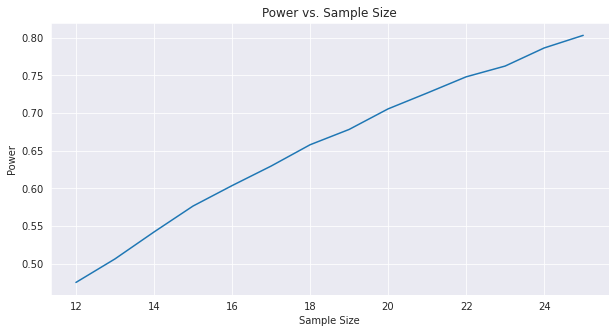

In [32]:
# Plot a sample size X Power line graph 
# Plot a sample size X Power line graph 

plt.figure(figsize=(10,5))
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = power_sample
df = pd.DataFrame(ans, index=None)
plt.plot(df[0], df[1])

plt.show()

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need a considerably higher number of patients. 

## BONUS: Investigating the relationship between Power, Sample Size, and Effect Size

You've seen how to calculate power given alpha, sample size, and effect size. To further investigate this relationship, it is interesting to plot the relationship between power and sample size for various effect sizes. 

To do this, run multiple simulations for varying parameters. Then store the parameters and plot the resulting dataset. Specifically:

1. Use a value of $\alpha$ = 0.05 for all of your simulations
2. Use the following effect sizes: [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
3. Use the sample sizes from 10 to 500
4. For each effect size sample size combination, calculate the accompanying power
5. Plot a line graph of the power vs sample size relationship. You should have 7 plots; one for each of the effect sizes listed above. All 7 plots can be on the same graph but should be labeled appropriately. Plot the power on the y-axis and sample size on the x-axis.

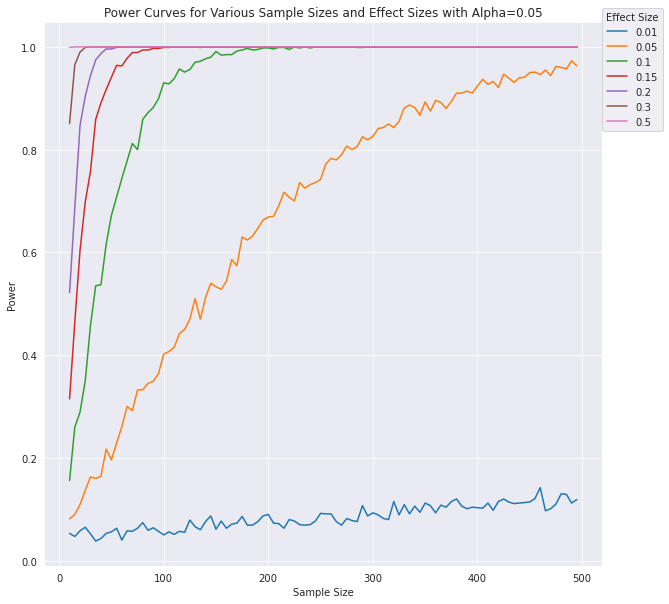

In [33]:
def power_curve(min_sample_size = 10, max_sample_size=500, n_sim = 1000, control_mean = 0,
                control_sd = 0.21, experimental_mean = 0.17, experimental_sd = 0.21):
    p = (np.empty(n_sim))
    p.fill(np.nan)

    # Keep iterating until desired power is obtained

    power_sample = []
    for sample_size in range(min_sample_size, max_sample_size, 5):

        data = np.empty([n_sim, sample_size, 2])
        data.fill(np.nan)

        # For control group 
        data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])

        # For experimental group
        data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            

        result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)

        p_vals = result[1]

        # Since you know that all simulations are from a different distribution \
        # all those that rejected the null-hypothesis are valid
        null_rejected = np.sum(p_vals < 0.05) / n_sim

        power_sample.append(null_rejected)

    return power_sample
cols = {}

for exp_mean in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
    col = power_curve(experimental_mean=exp_mean)
    cols[exp_mean] = col
df = pd.DataFrame.from_dict(cols)
df.index = list(range(10,500,5))
df.plot(figsize=(10,10))
plt.legend(title='Effect Size',loc=(1,0.8))
plt.title('Power Curves for Various Sample Sizes and Effect Sizes with Alpha=0.05')
plt.xlabel('Sample Size')
plt.ylabel('Power');